In [3]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv('datasets/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: title={'center': 'Scatter Plot'}, xlabel='Hours', ylabel='Scores'>

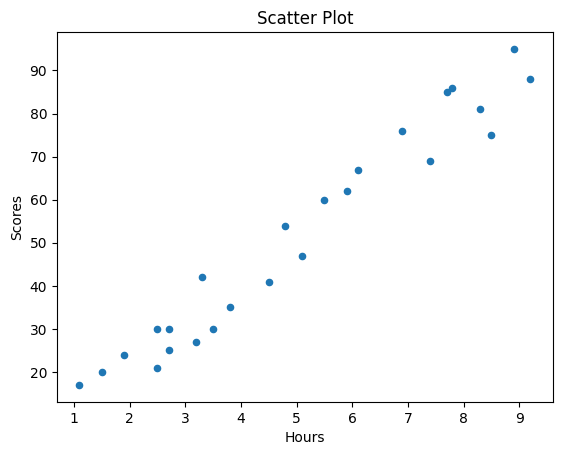

In [8]:
df.plot.scatter(x='Hours', y='Scores', title='Scatter Plot')

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
# creating 2 dimensional 
x = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

In [11]:
df['Hours'].shape,df['Scores'].shape

((25,), (25,))

In [12]:
x.shape, y.shape

((25, 1), (25, 1))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_train.shape, x_test.shape

((20, 1), (5, 1))

In [15]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
print(model.intercept_)
print(model.coef_)
print('score = {} * hours + {}'.format(model.intercept_, model.coef_))

[2.82689235]
[[9.68207815]]
score = [2.82689235] * hours + [[9.68207815]]


In [17]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [18]:
tst = np.array([5])
tst_re = tst.reshape(-1,1)

In [19]:
y_pred = model.predict(x_test)

In [20]:
tst_pred = model.predict(tst_re)
print(tst_pred)

[[51.23728313]]


In [21]:
df_pred = pd.DataFrame({
        'Actual': y_test.squeeze(),
        'Predicted': y_pred.squeeze()
})
df_pred.head()

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Mean Absolute Error (MAE): When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.


Mean Squared Error (MSE): It is similar to the MAE metric, but it squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.

Root Mean Squared Error (RMSE): Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. It is easier to interpret and good when we need to display or show the actual value of the data with the error. It shows how much the data may vary, so, if we have an RMSE of 4.35, our model can make an error either because it added 4.35 to the actual value, or needed 4.35 to get to the actual value. The closer to 0, the better as well.

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [23]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.92
Mean squared error: 18.94
Root mean squared error: 4.35


In [24]:
filename = 'linear_regression.pkl'
pickle.dump(model, open(filename, 'wb'))

## Next session will see Multiple Linear Regression